图像已保存到: loss_curve.png


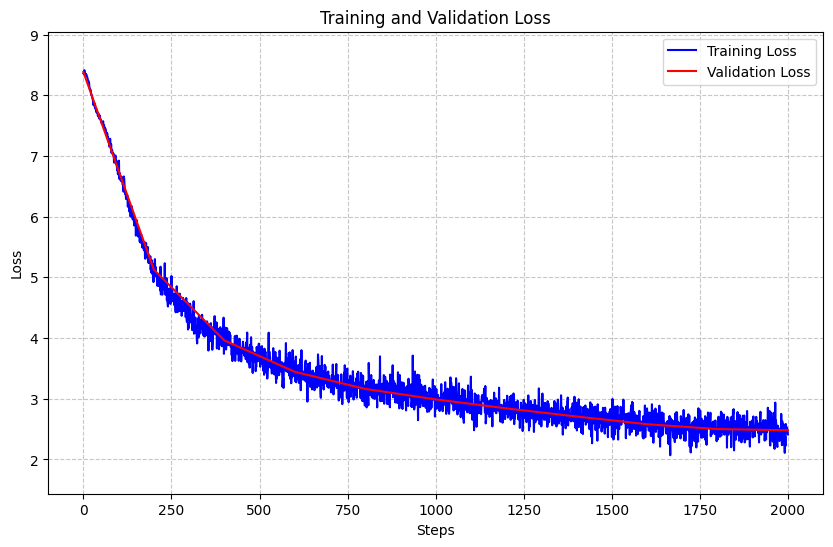

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

def load_json_file(file_path):
    """
    加载JSON文件
    
    参数:
    file_path: JSON文件路径
    
    返回:
    加载的JSON数据
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def plot_losses(train_file, valid_file, save_path=None):
    """
    绘制训练和验证损失曲线
    
    参数:
    train_file: 训练损失JSON文件路径
    valid_file: 验证损失JSON文件路径
    save_path: 图像保存路径，如果为None则显示图像而不保存
    """
    # 加载数据
    train_data = load_json_file(train_file)
    valid_data = load_json_file(valid_file)
    
    # 提取步骤和损失值
    train_steps = [item['step'] for item in train_data]
    train_losses = [item['train_loss'] for item in train_data]
    
    valid_steps = [item['step'] for item in valid_data]
    valid_losses = [item['valid_loss'] for item in valid_data]
    
    # 创建图像
    plt.figure(figsize=(10, 6))
    
    # 绘制训练损失
    plt.plot(train_steps, train_losses, 'b-', label='Training Loss')
    
    # 绘制验证损失
    plt.plot(valid_steps, valid_losses, 'r-', label='Validation Loss')
    
    # 添加图例和标签
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 设置y轴范围，给上下留出一些空间
    all_losses = train_losses + valid_losses
    min_loss, max_loss = min(all_losses), max(all_losses)
    margin = (max_loss - min_loss) * 0.1  # 10%的边距
    plt.ylim(max(0, min_loss - margin), max_loss + margin)
    
    # 保存或显示图像
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图像已保存到: {save_path}")
    else:
        plt.show()

# 使用示例
if __name__ == "__main__":
    # 绘制并显示损失曲线
    plot_losses('train_losses.json', 'valid_losses.json', 'loss_curve.png')
    
    # 绘制并保存损失曲线
    # plot_losses('logs/train_losses.json', 'logs/valid_losses.json', 'logs/loss_curve.png')